In [1]:
from labyrinth import maze
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
maze = np.array(maze)
maze[maze == "w"] = 1
maze[maze == "c"] = 0
maze = maze.astype(int)

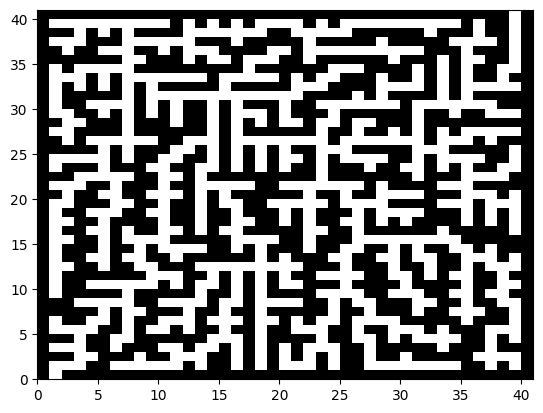

In [4]:
plt.pcolormesh(maze, cmap="Greys")